<a href="https://colab.research.google.com/github/A8stern/PyAD_mobile_2025/blob/main/lab_1_kovalev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Лабораторная работа 1**

*Выполнил: Ковалев Глеб К3341 367291*

Цель работы: Провести глубокий анализ географических и временных характеристик городов в составе федеративного государства, используя инструменты Python для обработки данных, расчётов и выявления закономерностей. Исследовать роль неизменяемости данных в обеспечении целостности анализа.


# **Теоретическая часть**

1) Выбрал Россию и ее автономные области для анализа, так как будут наиболее понятные для анализа результаты.

    Из республик взял:
- Республика Саха (столица: Якутск)
- Татарстан (столица: Казань)
- Башкиртостан (столица: Уфа)

2) Города республик:
- Республику Саха: Якутск, Нерюнгри, Мирный, Ленск, Алдан
- Татарстан: Казань, Набережные Челны, Нижнекамск, Альметьевск, Зеленодольск
- Башкиртостан: Уфа, Стерлитамак, Салават, Нефтекамск, Октябрьский

3) Характеристики городов

    Республика Саха:

- Якутск - Республика Саха; столица республики; координаты с высокой точностью: 62.027221, 129.732178; координаты с низкой точностью: 62.03, 129.73; часовой пояс - UTC +9 (+6 от Москвы)
- Нерюнгри - Республика Саха; не столица; координаты с высокой точностью: 56.657717, 124.712311; координаты с низкой точностью: 56.66, 124.71; часовой пояс - UTC +9 (+6 от Москвы)
- Мирный - Республика Саха; не столица; координаты с высокой точностью: 62.541065, 113.978603; координаты с низкой точностью: 62.54, 113.98; часовой пояс - UTC +9 (+6 от Москвы)
- Ленск - Республика Саха; не столица; координаты с высокой точностью: 60.713735, 114.911853; координаты с низкой точностью: 60.71, 114.91; часовой пояс - UTC +9 (+6 от Москвы)
- Алдан - Республика Саха; не столица; координаты с высокой точностью: 58.608597, 125.388878; координаты с низкой точностью: 58.61, 125.39; часовой пояс - UTC +9 (+6 от Москвы)

    Татарстан:
- Казань - Республика Татарстан; столица; координаты с высокой точностью: 55.796127, 49.106414; координаты с низкой точностью: 55.80, 49.11; часовой пояс - UTC +3 (Московское время)
- Набережные Челны - Республика Татарстан; не столица; координаты с высокой точностью: 55.741272, 52.403662; координаты с низкой точностью: 55.74, 52.40; часовой пояс - UTC +3 (Московское время)
- Нижнекамск - Республика Татарстан; не столица; координаты с высокой точностью: 55.637576, 51.819712; координаты с низкой точностью: 55.64, 51.82; часовой пояс - UTC +3 (Московское время)
- Альметьевск - Республика Татарстан; не столица; координаты с высокой точностью: 54.901171, 52.297230; координаты с низкой точностью: 54.90, 52.30; часовой пояс - UTC +3 (Московское время)
- Зеленодольск - Республика Татарстан; не столица; координаты с высокой точностью: 55.847048, 48.492802; координаты с низкой точностью: 55.85, 48.49; часовой пояс - UTC +3 (Московское время)

    Башкиртостан:

- Уфа - Республика Башкиртостан; столица; координаты с высокой точностью: 54.735152, 55.958736; координаты с низкой точностью: 54.74, 55.96; часовой пояс - UTC +5 ( +2 от московского времени)
- Стерлитамак - Республика Башкиртостан; не столица; координаты с высокой точностью: 53.630403, 55.930825; координаты с низкой точностью: 53.63, 55.93; часовой пояс - UTC +5 ( +2 от московского времени)
- Салават - Республика Башкиртостан; не столица; координаты с высокой точностью: 53.361651, 55.924681; координаты с низкой точностью: 53.36, 55.92; часовой пояс - UTC +5 ( +2 от московского времени)
- Нефтекамск - Республика Башкиртостан; не столица; координаты с высокой точностью: 56.088483, 54.247751; координаты с низкой точностью: 56.09, 54.25; часовой пояс - UTC +5 ( +2 от московского времени)
- Октябрьский - Республика Башкиртостан; не столица; координаты с высокой точностью: 54.481454, 53.465570; координаты с низкой точностью: 54.48, 53.47; часовой пояс - UTC +5 ( +2 от московского времени)



```
# Выбран кодовый формат
```

# **Python часть**

**Организация данных**

In [ ]:
from __future__ import annotations

from dataclasses import dataclass
from enum import Enum
from types import MappingProxyType
from typing import Tuple, Mapping, Dict
from collections import defaultdict
import pandas as pd
import numpy as np

class Region(Enum):
    SAKHA = "Республика Саха"
    TATARSTAN = "Республика Татарстан"
    BASHKORTOSTAN = "Республика Башкиртостан"
    MOSCOW = "Московская область"

@dataclass(frozen=True, slots=True)
class Coordinates_High:
    lat: float
    lon: float

@dataclass(frozen=True, slots=True)
class City_High:
    name: str
    region: Region
    is_capital: bool
    coord_high: Coordinates_High
    tz_utc_offset: int
    tz_moscow_offset: int

    def __iter__(self):
        yield self.name
        yield self.region
        yield self.is_capital
        yield self.coord_high
        yield self.tz_utc_offset
        yield self.tz_moscow_offset

@dataclass(frozen=True, slots=True)
class Coordinates_Low:
    lat: np.float16
    lon: np.float16

@dataclass(frozen=True, slots=True)
class City_Low:
    name: str
    region: Region
    is_capital: bool
    coord_low: Coordinates_Low
    tz_utc_offset: int
    tz_moscow_offset: int

    def __iter__(self):
        yield self.name
        yield self.region
        yield self.is_capital
        yield self.coord_low
        yield self.tz_utc_offset
        yield self.tz_moscow_offset

all_cities_high = [
    City_High(
        name="Якутск",
        region=Region.SAKHA,
        is_capital=True,
        coord_high=Coordinates_High(62.027221, 129.732178),
        tz_utc_offset=9,
        tz_moscow_offset=6,
    ),
    City_High(
        name="Нерюнгри",
        region=Region.SAKHA,
        is_capital=False,
        coord_high=Coordinates_High(56.657717, 124.712311),
        tz_utc_offset=9,
        tz_moscow_offset=6,
    ),
    City_High(
        name="Мирный",
        region=Region.SAKHA,
        is_capital=False,
        coord_high=Coordinates_High(62.541065, 113.978603),
        tz_utc_offset=9,
        tz_moscow_offset=6,
    ),
    City_High(
        name="Ленск",
        region=Region.SAKHA,
        is_capital=False,
        coord_high=Coordinates_High(60.713735, 114.911853),
        tz_utc_offset=9,
        tz_moscow_offset=6,
    ),
    City_High(
        name="Алдан",
        region=Region.SAKHA,
        is_capital=False,
        coord_high=Coordinates_High(58.608597, 125.388878),
        tz_utc_offset=9,
        tz_moscow_offset=6,
    ),

    City_High(
        name="Казань",
        region=Region.TATARSTAN,
        is_capital=True,
        coord_high=Coordinates_High(55.796127, 49.106414),
        tz_utc_offset=3,
        tz_moscow_offset=0,
    ),
    City_High(
        name="Набережные Челны",
        region=Region.TATARSTAN,
        is_capital=False,
        coord_high=Coordinates_High(55.741272, 52.403662),
        tz_utc_offset=3,
        tz_moscow_offset=0,
    ),
    City_High(
        name="Нижнекамск",
        region=Region.TATARSTAN,
        is_capital=False,
        coord_high=Coordinates_High(55.637576, 51.819712),
        tz_utc_offset=3,
        tz_moscow_offset=0,
    ),
    City_High(
        name="Альметьевск",
        region=Region.TATARSTAN,
        is_capital=False,
        coord_high=Coordinates_High(54.901171, 52.297230),
        tz_utc_offset=3,
        tz_moscow_offset=0,
    ),
    City_High(
        name="Зеленодольск",
        region=Region.TATARSTAN,
        is_capital=False,
        coord_high=Coordinates_High(55.847048, 48.492802),
        tz_utc_offset=3,
        tz_moscow_offset=0,
    ),

    City_High(
        name="Уфа",
        region=Region.BASHKORTOSTAN,
        is_capital=True,
        coord_high=Coordinates_High(54.735152, 55.958736),
        tz_utc_offset=5,
        tz_moscow_offset=2,
    ),
    City_High(
        name="Стерлитамак",
        region=Region.BASHKORTOSTAN,
        is_capital=False,
        coord_high=Coordinates_High(53.630403, 55.930825),
        tz_utc_offset=5,
        tz_moscow_offset=2,
    ),
    City_High(
        name="Салават",
        region=Region.BASHKORTOSTAN,
        is_capital=False,
        coord_high=Coordinates_High(53.361651, 55.924681),
        tz_utc_offset=5,
        tz_moscow_offset=2,
    ),
    City_High(
        name="Нефтекамск",
        region=Region.BASHKORTOSTAN,
        is_capital=False,
        coord_high=Coordinates_High(56.088483, 54.247751),
        tz_utc_offset=5,
        tz_moscow_offset=2,
    ),
    City_High(
        name="Октябрьский",
        region=Region.BASHKORTOSTAN,
        is_capital=False,
        coord_high=Coordinates_High(54.481454, 53.465570),
        tz_utc_offset=5,
        tz_moscow_offset=2,
    ),
]

print(len(all_cities_high))

15


In [ ]:
# Новый датасет с меньшей точностью координат

def make_low_coords(cities: List[City_High]) -> List[City_Low]:
    records: List[City_Low] = []
    for c in cities:
        low_lat = np.float16(round(c.coord_high.lat, 2))
        low_lon = np.float16(round(c.coord_high.lon, 2))

        records.append(
            City_Low(
                name=c.name,
                region=c.region,
                is_capital=c.is_capital,
                coord_low=Coordinates_Low(low_lat, low_lon),
                tz_utc_offset=c.tz_utc_offset,
                tz_moscow_offset=c.tz_moscow_offset,
            )
        )
    return records

all_cities_low = make_low_coords(all_cities_high)
df_low = pd.DataFrame.from_records(all_cities_low)

df_low.head()

,0,1,2,3,4,5
0,Якутск,Region.SAKHA,True,"Coordinates_Low(lat=np.float16(62.03), lon=np....",9,6
1,Нерюнгри,Region.SAKHA,False,"Coordinates_Low(lat=np.float16(56.66), lon=np....",9,6
2,Мирный,Region.SAKHA,False,"Coordinates_Low(lat=np.float16(62.53), lon=np....",9,6
3,Ленск,Region.SAKHA,False,"Coordinates_Low(lat=np.float16(60.72), lon=np....",9,6
4,Алдан,Region.SAKHA,False,"Coordinates_Low(lat=np.float16(58.62), lon=np....",9,6


In [ ]:
# Подсчет памяти

def cities_high_to_df(cities):
    rows = []
    for c in cities:
        rows.append({
            "name": c.name,
            "region": c.region.value,
            "is_capital": c.is_capital,
            "lat_hi": c.coord_high.lat,
            "lon_hi": c.coord_high.lon,
            "tz_utc_offset": c.tz_utc_offset,
            "tz_moscow_offset": c.tz_moscow_offset,
        })
    return pd.DataFrame(rows)


def cities_low_to_df(cities):
    rows = []
    for c in cities:
        rows.append({
            "name": c.name,
            "region": c.region.value,
            "is_capital": c.is_capital,
            "lat_lo": c.coord_low.lat,
            "lon_lo": c.coord_low.lon,
            "tz_utc_offset": c.tz_utc_offset,
            "tz_moscow_offset": c.tz_moscow_offset,
        })
    return pd.DataFrame(rows)


df_hi_raw = cities_high_to_df(all_cities_high)
df_lo_raw = cities_low_to_df(all_cities_low)

df_hi = (
    df_hi_raw.assign(
        lat=df_hi_raw["lat_hi"].astype(np.float64),
        lon=df_hi_raw["lon_hi"].astype(np.float64),
    )
    .drop(columns=["lat_hi", "lon_hi"])
)

df_lo = (
    df_lo_raw.assign(
        lat=df_lo_raw["lat_lo"].astype(np.float16),
        lon=df_lo_raw["lon_lo"].astype(np.float16),
    )
    .drop(columns=["lat_lo", "lon_lo"])
)

mem_hi = df_hi.memory_usage(deep=True).sum()
mem_lo = df_lo.memory_usage(deep=True).sum()

mem_gain = (mem_hi - mem_lo) / mem_hi * 100

print(f"Память (высокая точность, float64): {mem_hi / 1024:.3f} KiB")
print(f"Память (низкая точность, float16): {mem_lo / 1024:.3f} KiB")
print(f"Экономия: {mem_gain:.2f} %")

df_hi.head(), df_lo.head()

Память (высокая точность, float64): 3.622 KiB
Память (низкая точность, float16): 3.446 KiB
Экономия: 4.85 %


/usr/local/lib/python3.12/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


(       name           region  is_capital  tz_utc_offset  tz_moscow_offset  \
 0    Якутск  Республика Саха        True              9                 6   
 1  Нерюнгри  Республика Саха       False              9                 6   
 2    Мирный  Республика Саха       False              9                 6   
 3     Ленск  Республика Саха       False              9                 6   
 4     Алдан  Республика Саха       False              9                 6   
 
          lat         lon  
 0  62.027221  129.732178  
 1  56.657717  124.712311  
 2  62.541065  113.978603  
 3  60.713735  114.911853  
 4  58.608597  125.388878  ,
        name           region  is_capital  tz_utc_offset  tz_moscow_offset  \
 0    Якутск  Республика Саха        True              9                 6   
 1  Нерюнгри  Республика Саха       False              9                 6   
 2    Мирный  Республика Саха       False              9                 6   
 3     Ленск  Республика Саха       False        

Мы увидели, что у нас разница между float64 и float16 примерно 5%. На большом массиве данных это будет весомая разница. Однако мы можем заметить, что после разных преобразований у нас потерялась точность координат. От конкретной задачи зависит критично это или нет, конкретно на примере Якутска мы можем посмотреть, указывают ли координаты все еще на Якутск. 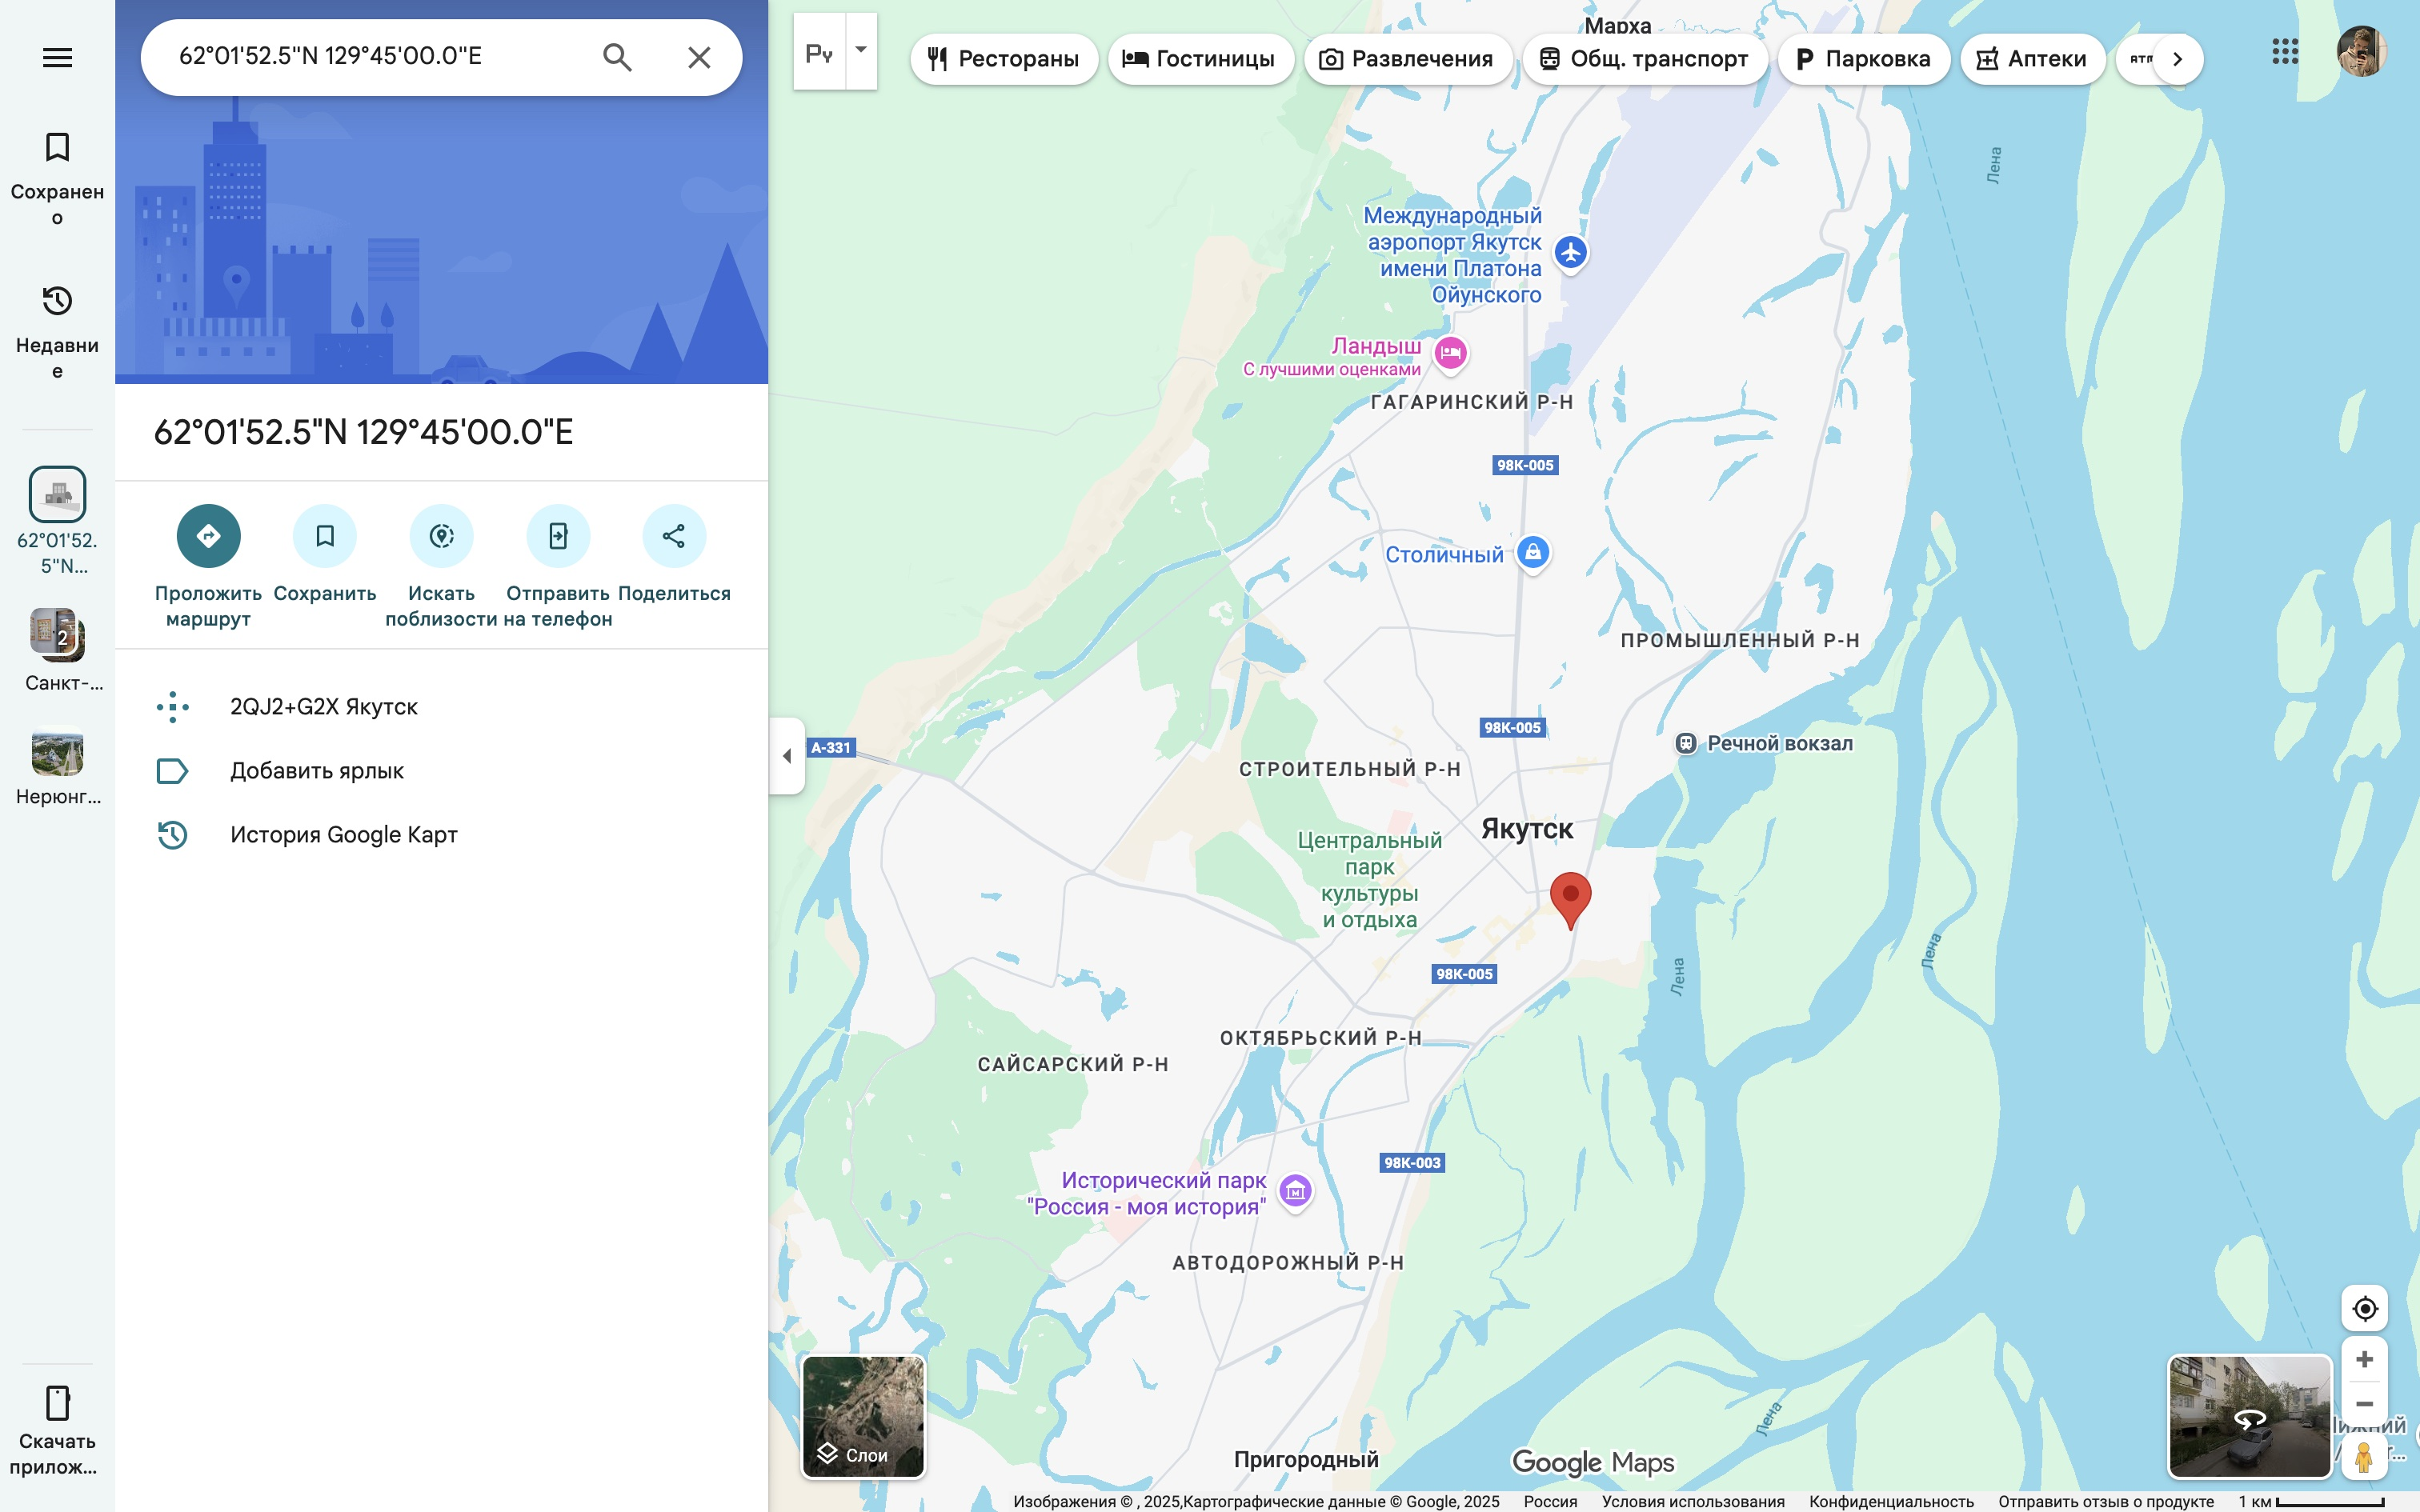
Как мы видим мы все еще в Якутске, поэтому конкретно для данного задания, где нам нужны координаты в пределе города можно использовать именно float16.


**Анализ расстояний**

In [ ]:
moscow_high = City_High(
        name="Москва",
        region=Region.MOSCOW,
        is_capital=True,
        coord_high=Coordinates_High(55.755864, 37.617698),
        tz_utc_offset=3,
        tz_moscow_offset=0,
    )
moscow_low = City_Low(
        name="Москва",
        region=Region.MOSCOW,
        is_capital=True,
        coord_low=Coordinates_Low(55.76, 37.62),
        tz_utc_offset=3,
        tz_moscow_offset=0,
    )

In [ ]:
import math

R = 6371.0088

def to_radians(deg: float) -> float:
    return math.radians(deg)

def haversine_distance_km(lat1_deg: float, lon1_deg: float, lat2_deg: float, lon2_deg: float) -> float:
    lat1, lon1, lat2, lon2 = map(to_radians, [lat1_deg, lon1_deg, lat2_deg, lon2_deg])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1)*math.cos(lat2)*math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))
    return R * c

In [ ]:
def from_moscow_high(city: City_High):
    return haversine_distance_km(moscow_high.coord_high.lat, moscow_high.coord_high.lon, city.coord_high.lat, city.coord_high.lon)

def from_moscow_low(city: City_Low):
    return haversine_distance_km(moscow_low.coord_low.lat, moscow_low.coord_low.lon, city.coord_low.lat, city.coord_low.lon)

def get_max_from_high_from_moscow(cities: List[City_High]):
    max_val = 0
    name = ""
    for city in cities:
        value = from_moscow_high(city)
        if value > max_val:
            max_val = value
            name = city.name

    return f"{name}: {max_val:.2f} км, шесть знаков после запятой"

def get_max_from_low_from_moscow(cities: List[City_Low]):
    max_val = 0
    name = ""
    for city in cities:
        value = from_moscow_low(city)
        if max_val < value:
            max_val = value
            name = city.name
    return f"{name}: {max_val:.2f} км, два знака после запятой"

print(get_max_from_high_from_moscow(all_cities_high))
print(get_max_from_low_from_moscow(all_cities_low))

Нерюнгри: 5011.40 км, шесть знаков после запятой
Нерюнгри: 5009.90 км, два знака после запятой


In [ ]:
def get_capitals_high(cities: List[City_High]) -> Dict[Region, City_High]:
    capitals: Dict[Region, City_High] = {}
    for c in cities:
        if c.is_capital:
            capitals[c.region] = c
    return capitals

def distance_to_capital_high(city: City_High, capitals: Dict[Region, City_High]) -> float:
    capital = capitals[city.region]
    return haversine_distance_km(
        capital.coord_high.lat,
        capital.coord_high.lon,
        city.coord_high.lat,
        city.coord_high.lon,
    )

def farthest_cities_from_capitals_high(cities: List[City_High]) -> List[str]:
    capitals = get_capitals_high(cities)
    max_by_region: Dict[Region, Tuple[str, float]] = {}

    for city in cities:
        if city.is_capital:
            continue

        dist = distance_to_capital_high(city, capitals)
        current = max_by_region.get(city.region)

        if current is None or dist > current[1]:
            max_by_region[city.region] = (city.name, dist)

    result = []
    for region, (name, dist) in max_by_region.items():
        result.append(f"{region.value}: {name} — {dist:.2f} км")
    return result

for line in farthest_cities_from_capitals_high(all_cities_high):
    print(line)

Республика Саха: Мирный — 814.66 км
Республика Татарстан: Альметьевск — 224.92 км
Республика Башкиртостан: Нефтекамск — 185.22 км


In [ ]:
def get_capitals_low(cities: List[City_Low]) -> Dict[Region, City_Low]:
    capitals: Dict[Region, City_Low] = {}
    for c in cities:
        if c.is_capital:
            capitals[c.region] = c
    return capitals

def distance_to_capital_low(city: City_Low, capitals: Dict[Region, City_Low]) -> float:
    capital = capitals[city.region]
    return haversine_distance_km(
        float(capital.coord_low.lat),
        float(capital.coord_low.lon),
        float(city.coord_low.lat),
        float(city.coord_low.lon),
    )

def farthest_cities_from_capitals_low(cities: List[City_Low]) -> List[str]:
    capitals = get_capitals_low(cities)
    max_by_region: Dict[Region, Tuple[str, float]] = {}

    for city in cities:
        if city.is_capital:
            continue

        dist = distance_to_capital_low(city, capitals)
        current = max_by_region.get(city.region)

        if current is None or dist > current[1]:
            max_by_region[city.region] = (city.name, dist)

    result = []
    for region, (name, dist) in max_by_region.items():
        result.append(f"{region.value}: {name} — {dist:.2f} км (low)")
    return result

for line in farthest_cities_from_capitals_low(all_cities_low):
    print(line)

Республика Саха: Мирный — 814.45 км (low)
Республика Татарстан: Альметьевск — 225.24 км (low)
Республика Башкиртостан: Нефтекамск — 184.62 км (low)


In [ ]:
def mean_intercity_distance_by_region_high(cities: List[City_High]) -> List[str]:
    regions: Dict[Region, List[City_High]] = defaultdict(list)
    for c in cities:
        regions[c.region].append(c)

    result: List[str] = []

    for region, region_cities in regions.items():
        n = len(region_cities)
        if n < 2:
            continue

        total_dist = 0.0
        pair_count = 0

        for i in range(n):
            for j in range(i + 1, n):
                a = region_cities[i]
                b = region_cities[j]
                d = haversine_distance_km(
                    a.coord_high.lat, a.coord_high.lon,
                    b.coord_high.lat, b.coord_high.lon,
                )
                total_dist += d
                pair_count += 1

        mean_dist = total_dist / pair_count
        result.append(f"{region.value}: {mean_dist:.2f} км (high)")

    return result

def mean_intercity_distance_by_region_low(cities: List[City_Low]) -> List[str]:
    regions: Dict[Region, List[City_Low]] = defaultdict(list)
    for c in cities:
        regions[c.region].append(c)

    result: List[str] = []

    for region, region_cities in regions.items():
        n = len(region_cities)
        if n < 2:
            continue

        total_dist = 0.0
        pair_count = 0

        for i in range(n):
            for j in range(i + 1, n):
                a = region_cities[i]
                b = region_cities[j]
                d = haversine_distance_km(
                    float(a.coord_low.lat), float(a.coord_low.lon),
                    float(b.coord_low.lat), float(b.coord_low.lon),
                )
                total_dist += d
                pair_count += 1

        mean_dist = total_dist / pair_count
        result.append(f"{region.value}: {mean_dist:.2f} км (low)")

    return result

print("HIGH precision:")
for line in mean_intercity_distance_by_region_high(all_cities_high):
    print(line)

print("\nLOW precision:")
for line in mean_intercity_distance_by_region_low(all_cities_low):
    print(line)

HIGH precision:
Республика Саха: 615.85 км (high)
Республика Татарстан: 157.67 км (high)
Республика Башкиртостан: 184.48 км (high)

LOW precision:
Республика Саха: 614.94 км (low)
Республика Татарстан: 157.46 км (low)
Республика Башкиртостан: 184.44 км (low)


Разница между расстояниями в среднем <1 км (только в большом расстоянии до Москвы была разница больше - 1.5 км). Так как мы рассматриваем расстояние между городами, а не конкретными точками можно пренебречь такой погрешностью и использовать округление.

**Анализ часовых часов**

In [ ]:
def check_same_timezone_by_region(cities: List[City_High]) -> List[str]:
    offsets_by_region: Dict[Region, Set[int]] = defaultdict(set)

    for c in cities:
        offsets_by_region[c.region].add(c.tz_utc_offset)

    result: List[str] = []

    for region, offsets in offsets_by_region.items():
        if len(offsets) == 1:
            offset = next(iter(offsets))
            result.append(f"{region.value}: один часовой пояс (UTC+{offset})")
        else:
            offsets_str = ", ".join(f"UTC+{o}" for o in sorted(offsets))
            result.append(f"{region.value}: разные часовые пояса: {offsets_str}")

    return result

for line in check_same_timezone_by_region(all_cities_high):
    print(line)

Республика Саха: один часовой пояс (UTC+9)
Республика Татарстан: один часовой пояс (UTC+3)
Республика Башкиртостан: один часовой пояс (UTC+5)


In [ ]:
def find_same_time_across_regions(cities: List[City_High]) -> List[str]:
    by_offset: Dict[int, List[City_High]] = {}

    for c in cities:
        offset = c.tz_utc_offset
        if offset not in by_offset:
            by_offset[offset] = []
        by_offset[offset].append(c)

    result: List[str] = []

    for offset, group in by_offset.items():
        regions = {c.region for c in group}

        if len(regions) < 2:
            continue

        parts = [f"{c.name} ({c.region.value})" for c in group]
        result.append(f"UTC+{offset}: {', '.join(parts)}")

    if not result:
        return ["Совпадающих часовых поясов между разными республиками не обнаружено"]

    return result

for line in find_same_time_across_regions(all_cities_high):
    print(line)

Совпадающих часовых поясов между разными республиками не обнаружено


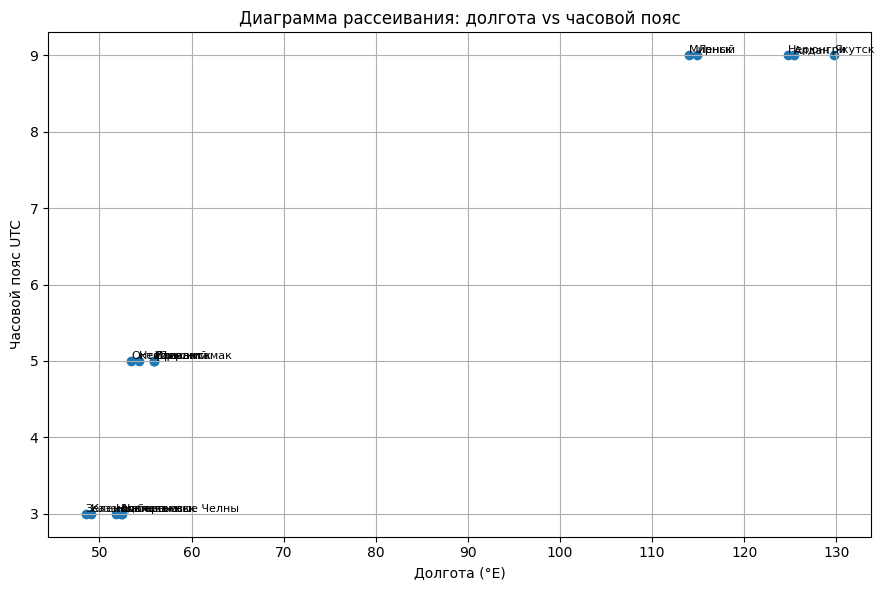

In [ ]:
import matplotlib.pyplot as plt

def scatter_longitude_vs_timezone(cities: List[City_High]):
    lons = [c.coord_high.lon for c in cities]
    tz = [c.tz_utc_offset for c in cities]
    names = [c.name for c in cities]

    plt.figure(figsize=(9, 6))
    plt.scatter(lons, tz)

    for x, y, name in zip(lons, tz, names):
        plt.text(x, y, name, fontsize=8, ha="left", va="bottom")

    plt.xlabel("Долгота (°E)")
    plt.ylabel("Часовой пояс UTC")
    plt.title("Диаграмма рассеивания: долгота vs часовой пояс")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Пример вызова:
scatter_longitude_vs_timezone(all_cities_high)

По данной диаграмме рассеивания можно понять, что корреляции нет. Разница между Набережными Челны и Стерлитамаком намного меньше, чем между Мирным и Якутском, однако часовые пояса у них разные. Следовательно часовой пояс не зависит от долготы. Так что однозначно определить часовой пояс по долготе нельзя.

**Анализ структур данных**

В моей структуре данных я сделал все поля неизменяемыми по простой причине корректности изначальных данных. Изначальные данные города меняются очень редко, а при смене данных легче удалить прошлый элемент и вставить новый.

In [ ]:
try:
    test_city = all_cities_high[0]
    test_city.coord_high.lat = 20.111111
    print(test_city)
except Exception as e:
    print(type(e).__name__, str(e))

FrozenInstanceError cannot assign to field 'lat'


Я изменил все поля на изменяемые и результат был интересный. Использование памяти немного выросло, но оно выросло пропорционально, то есть изменяемость датасета влияет на память, но она возрастает пропорционально. 5% как были в измерении, так и остались. Корректность работы остальных функций сохранилась.

**Вопросы**

Q: Почему в некоторых республиках все города находятся в одном часовом поясе, а в других — нет? Как это связано с их географическим положением?

A: Потому что территории республики могут быть очень большими или маленькими, в зависимости от географического положения правительство выбирает часовой пояс конкретного места, все зависит от случая.

Q: Может ли город, расположенный западнее другого, иметь более позднее местное время? Приведите пример из ваших данных и объясните причину. (если подобный факт свершился для вышей выборки)

A: Да, может, пример: Москва и Казань. Так произошло, потому что часовые пояса определяются не географически, а административно.

Q: Если наименование города и часовой пояс назначены изменяемыми, приведите обоснование (например, анализ частоты изменения данных параметров за последние годы)

A: У меня не обозначены, однако именно об этом я думал. Название города может меняться (например Астана - Нурсултан - Астана), также есть переход на зимнее время (ранее менялось время в России на зимнее - летнее, однако сейчас такого нет)

Q: Почему использование определённых типов данных предотвращает логические ошибки в геоанализе?

A: Потому что некоторые типы данных могут сделать данные неточными при преобразованиях (например как у меня float16).

Q: Можно ли считать, что часовой пояс является функцией от долготы? На основе ваших данных (если не попали в выборку, то нужно рассмотреть внешние источники) дайте аргументированный ответ с примерами отклонений.

A: Мне кажется, что нет, например Татарстан и Москва живет по одному часовому поясу, разница долготы в Якутии доказала, что время это не географический вопрос, а административный.